In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Age,50,38,53,28,37,49,52,31,42,37
Workclass,Self-emp-not-inc,Private,Private,Private,Private,Private,Self-emp-not-inc,Private,Private,Private
Fnlwgt,83311,215646,234721,338409,284582,160187,209642,45781,159449,280464
Education,Bachelors,HS-grad,11th,Bachelors,Masters,9th,HS-grad,Masters,Bachelors,Some-college
Education_num,13,9,7,13,14,5,9,14,13,10
Marital_status,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-spouse-absent,Married-civ-spouse,Never-married,Married-civ-spouse,Married-civ-spouse
Occupation,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty,Exec-managerial,Other-service,Exec-managerial,Prof-specialty,Exec-managerial,Exec-managerial
Relationship,Husband,Not-in-family,Husband,Wife,Wife,Not-in-family,Husband,Not-in-family,Husband,Husband
Race,White,White,Black,Black,White,Black,White,White,White,Black
Sex,Male,Male,Male,Female,Female,Female,Male,Female,Male,Male


In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

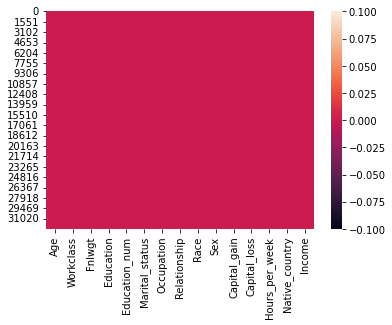

In [5]:
sns.heatmap(df.isnull())

As per above visualization there is no null values

In [6]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [7]:
df.replace(to_replace=" ?", value=np.nan, inplace= True)
df =df.dropna()
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.isin(["?"]).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As per above data education and education numbers both are similar then drop education,.Drop capacity gain and capacity loss as not required for model analysis

In [9]:
df.drop(['Education','Capital_gain',"Capital_loss"], axis=1, inplace=True)

In [10]:
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Workclass, dtype: int64

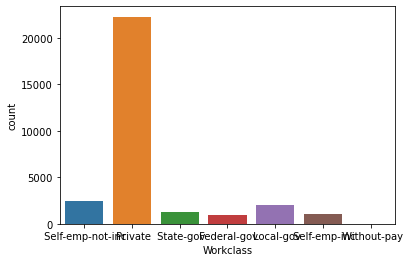

In [11]:
sns.countplot(x='Workclass', data=df)
df['Workclass'].value_counts()

As per above visualization Private employees are 22286, 2499 are Self-emp-not-inc, 2067 are Local-gov, 1278 are state-gov,1074 are Self-emp-inc, 943 are from Federal-gov and 14 are without-pay

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: Marital_status, dtype: int64

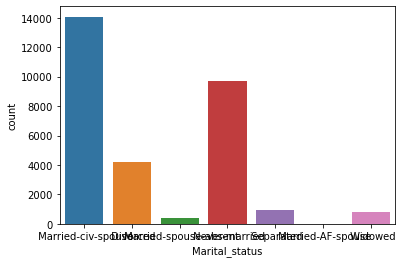

In [12]:
sns.countplot(x='Marital_status', data=df)
df['Marital_status'].value_counts()

As per above visualization 14065 are married-civ-spouse, 9725 are Neve-married, 4214 are Divorced, 939 are Seperated, 827 are widow, 370 are Married-spouse-absent and 21 are Married-AF-spouse

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3720
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: Occupation, dtype: int64

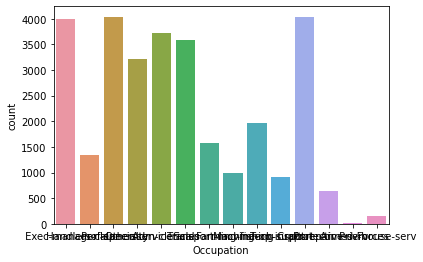

In [13]:
sns.countplot(x='Occupation', data=df)
df['Occupation'].value_counts()

As per above visualization it is showing the different catagories of occupation with numbers

 Husband           12463
 Not-in-family      7725
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: Relationship, dtype: int64

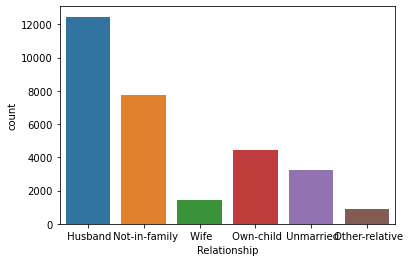

In [14]:
sns.countplot(x='Relationship', data=df)
df['Relationship'].value_counts()

As per above visualization 12463 are married, 7725 are Not-in-familiy, 4466 are having child, 3212 are unmarried, 1406 are wives and 889 are other relatives

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: Race, dtype: int64

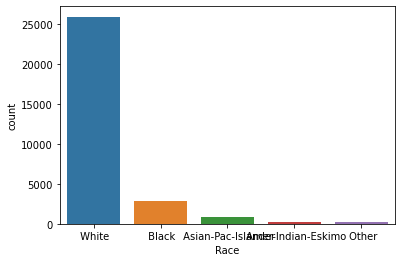

In [15]:
sns.countplot(x='Race', data=df)
df['Race'].value_counts()

As per above visualization 25932 employees are White in complexion, 2817 are Black in complexion, 895 are Asian-Pac-Islander, 231 are from other

 Male      20379
 Female     9782
Name: Sex, dtype: int64

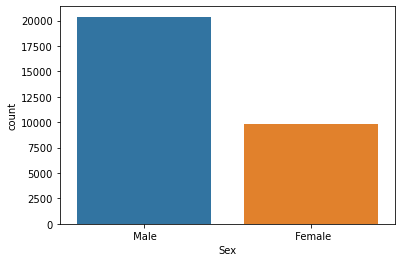

In [16]:
sns.countplot(x='Sex', data=df)
df['Sex'].value_counts()

As per abovve visualization 20379 are male and 9782 are females

 United-States                 27503
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

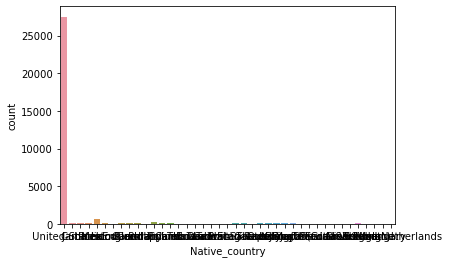

In [17]:
sns.countplot(x='Native_country', data=df)
df['Native_country'].value_counts()

As per above visualization the highest employee native country is United states, as per above data there are 42 different countries.

 <=50K    22653
 >50K      7508
Name: Income, dtype: int64

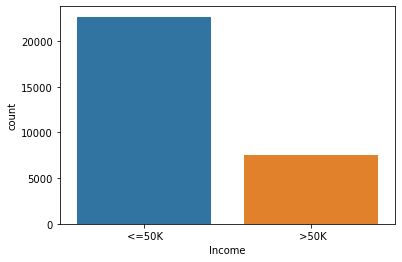

In [18]:
sns.countplot(x='Income', data=df)
df['Income'].value_counts()

As per above visualization 22653 employees having salary <=50K and 7508 employees ahving salary >50K

In [19]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

<AxesSubplot:xlabel='Age', ylabel='Density'>

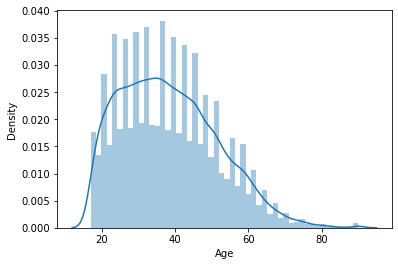

In [20]:
sns.distplot(df['Age'], kde= True)

As per above visualization the data is higher on 30-40 years age people

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

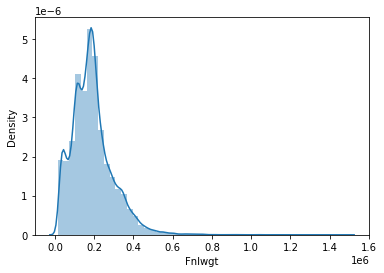

In [21]:
sns.distplot(df['Fnlwgt'], kde= True)

The highly spreade final weight spreaded at 0.1-0.2

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

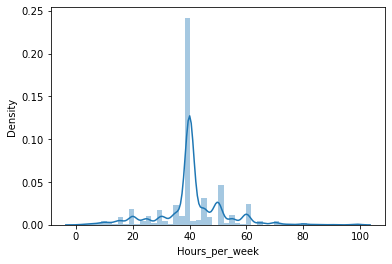

In [22]:
sns.distplot(df['Hours_per_week'], kde= True)

The highly distributed data between 35-45

As per above visualization skewness is present is data

Relation with Target column

<AxesSubplot:xlabel='Age', ylabel='Income'>

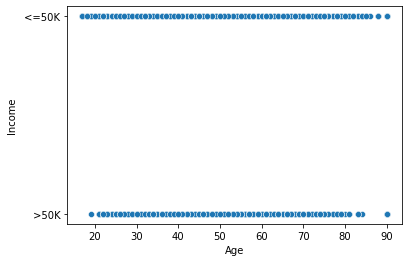

In [23]:
sns.scatterplot(data=df,x='Age',y='Income')

As per above visualization Age is somehow equally distributed with target variable but some outliers are present

<AxesSubplot:xlabel='Workclass', ylabel='Income'>

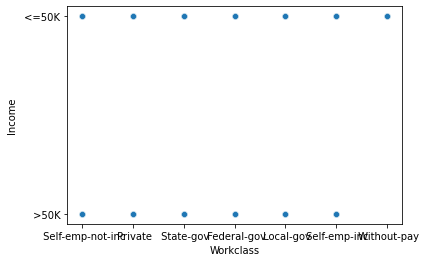

In [24]:
sns.scatterplot(data=df,x='Workclass',y='Income')

As per above visualization Workclass is somehow equally distributed with target variable but some outliers are present

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

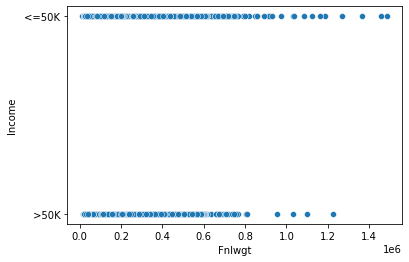

In [25]:
sns.scatterplot(data=df,x='Fnlwgt',y='Income')

As per above visualization Fnlwgt is not equally distributed with target variable and some outliers are present

<AxesSubplot:xlabel='Education_num', ylabel='Income'>

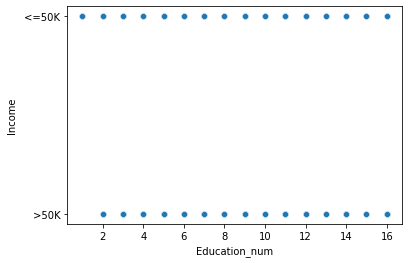

In [26]:
sns.scatterplot(data=df,x='Education_num',y='Income')

As per above visualization Education_num is somehow equally distributed with target variable but some outliers are present

<AxesSubplot:xlabel='Marital_status', ylabel='Income'>

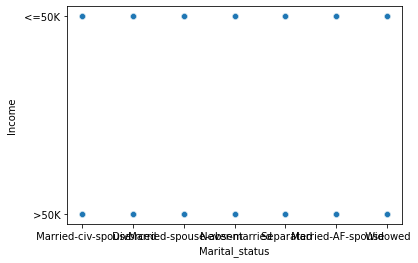

In [27]:
sns.scatterplot(data=df,x='Marital_status',y='Income')

As per above visualization Marital_staus is equally distributed with target variable

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

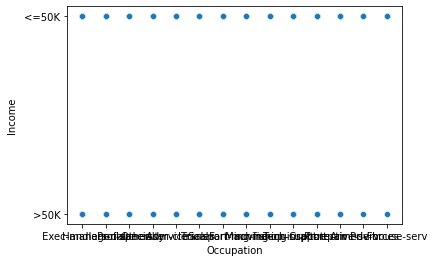

In [28]:
sns.scatterplot(data=df,x='Occupation',y='Income')

As per above visualization Occupation is equally distributed with target variable

<AxesSubplot:xlabel='Marital_status', ylabel='Income'>

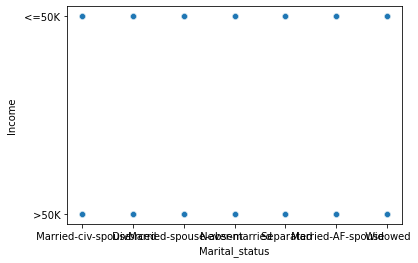

In [29]:
sns.scatterplot(data=df,x='Marital_status',y='Income')

As per above visualization Marital_status is equally distributed with target variable

<AxesSubplot:xlabel='Race', ylabel='Income'>

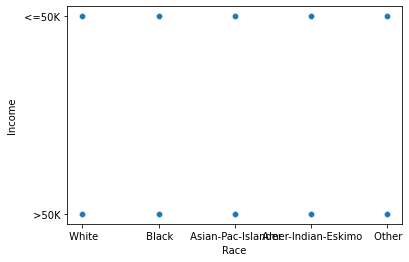

In [30]:
sns.scatterplot(data=df,x='Race',y='Income')

As per above visualization Race is equally distributed with target variable

<AxesSubplot:xlabel='Sex', ylabel='Income'>

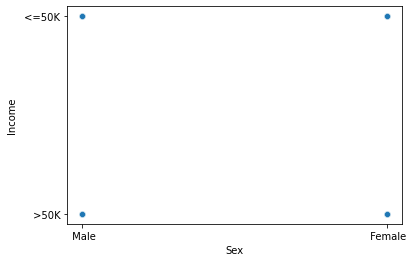

In [31]:
sns.scatterplot(data=df,x='Sex',y='Income')

As per above visualization Sex is equally distributed with target variable

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

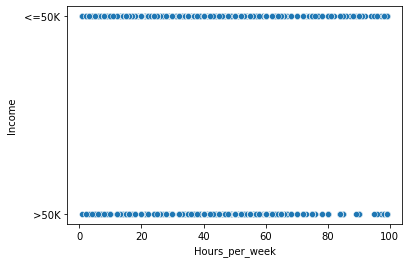

In [32]:
sns.scatterplot(data=df,x='Hours_per_week',y='Income')

As per above visualization Hours per week is somehow equally distributed or some places not equallt distributed with target variable but some outliers are present

<AxesSubplot:xlabel='Native_country', ylabel='Income'>

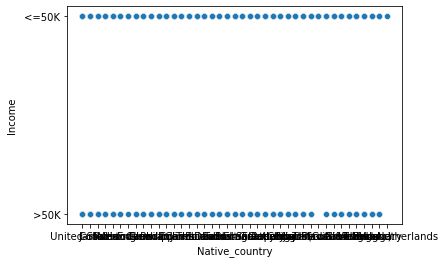

In [33]:
sns.scatterplot(data=df,x='Native_country',y='Income')

As per above visualization Native_country is somehow equally distributed or some places not equallt distributed with target variable but some outliers are present

# Label Encoder

In [34]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

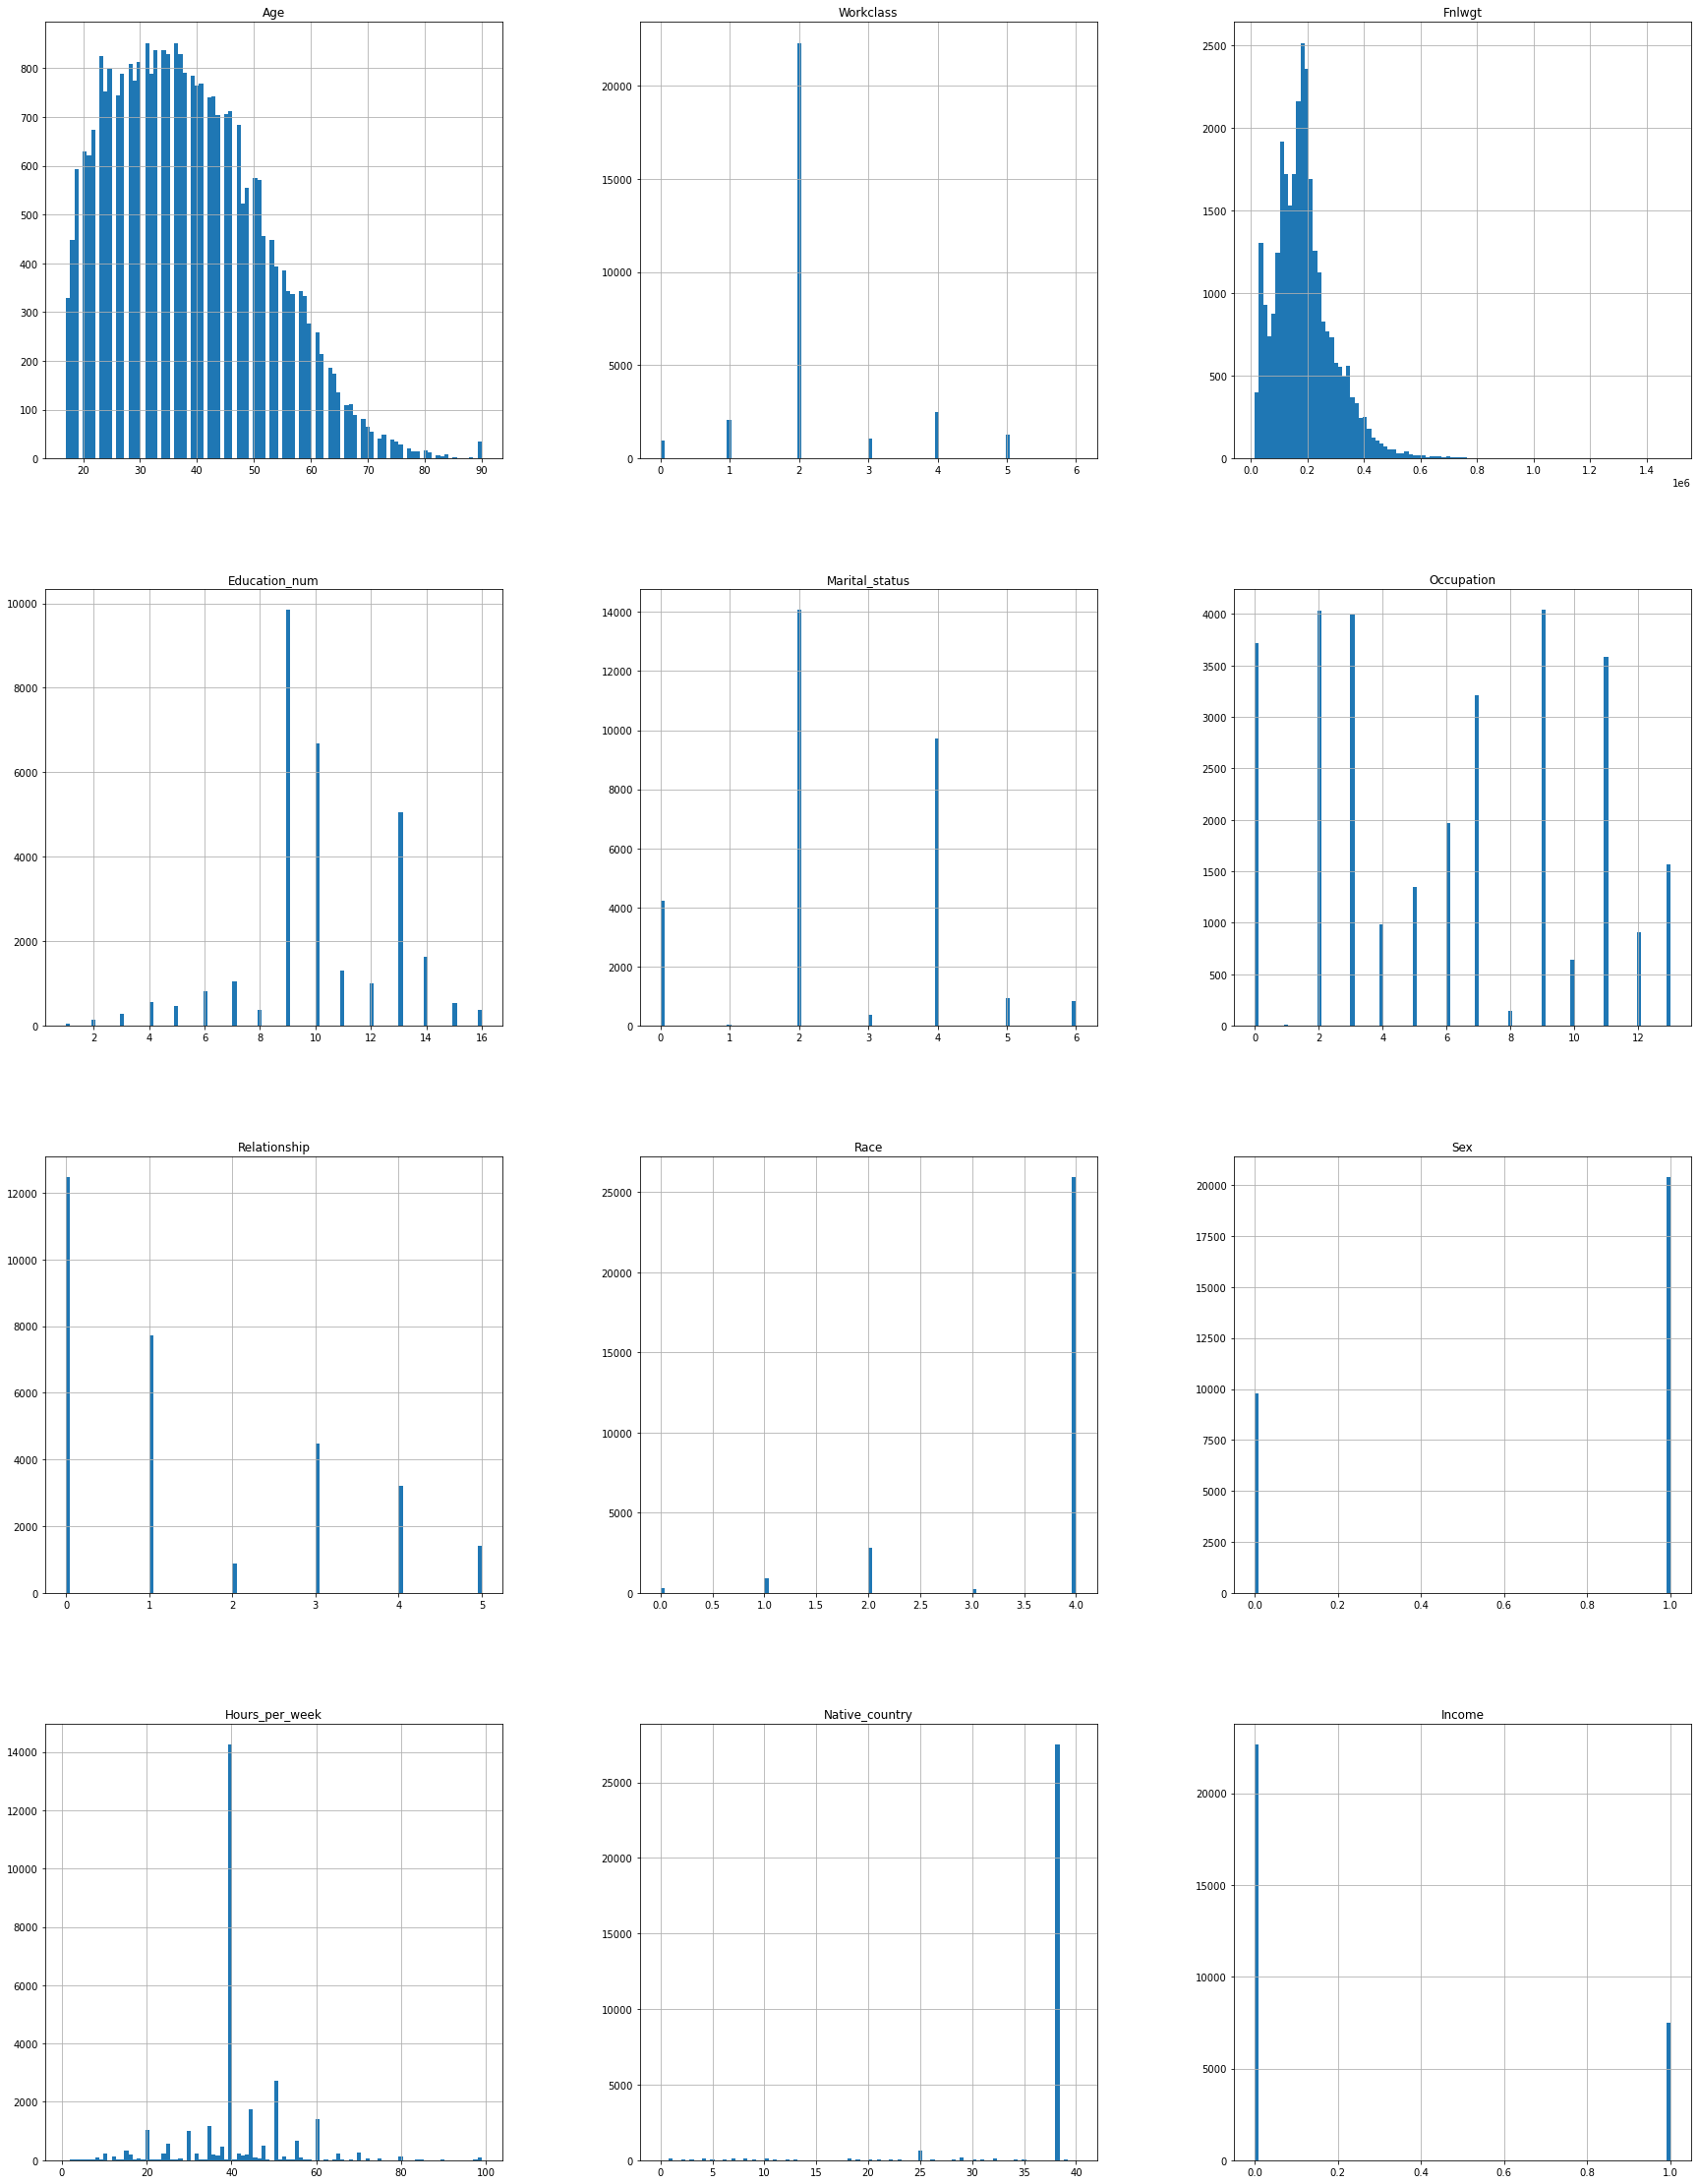

In [35]:
df.hist(figsize= (30,40), bins =100, xlabelsize = 10, ylabelsize = 10)
plt.show()

As per above visualization it is showing the hist distribution of data

In [36]:
df.describe()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
count,30161.000000,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,2.199231,1.897976e+05,10.121216,2.580087,5.960048,1.418355,3.678592,0.675674,40.931269,36.382514,0.248931
std,13.134882,0.953804,1.056527e+05,2.549983,1.498018,4.029487,1.601363,0.834721,0.468130,11.980182,6.105467,0.432401
min,17.000000,0.000000,1.376900e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176280e+05,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784290e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376300e+05,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99.000000,40.000000,1.000000


As per above data representation shows the differance between min, 25%,50%, 75% and max is not equal. So that skewness is present in the data

In [37]:
df.corr()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.080548,-0.076511,0.043525,-0.276378,-0.005680,-0.246456,0.023373,0.081992,0.101599,-0.001905,0.242000
Workclass,0.080548,1.000000,-0.032395,0.037729,-0.034338,0.015719,-0.067401,0.044700,0.074917,0.050738,0.007644,0.018103
Fnlwgt,-0.076511,-0.032395,1.000000,-0.044954,0.032197,0.000152,0.009289,-0.023882,0.025387,-0.022889,-0.066709,-0.008978
Education_num,0.043525,0.037729,-0.044954,1.000000,-0.063457,0.087778,-0.091928,0.032791,0.006131,0.152528,0.091547,0.335317
Marital_status,-0.276378,-0.034338,0.032197,-0.063457,1.000000,0.022702,0.177975,-0.068641,-0.119837,-0.189004,-0.025911,-0.193504
Occupation,-0.005680,0.015719,0.000152,0.087778,0.022702,1.000000,-0.053742,0.000736,0.062350,0.018362,-0.003470,0.051551
Relationship,-0.246456,-0.067401,0.009289,-0.091928,0.177975,-0.053742,1.000000,-0.117140,-0.584876,-0.257851,-0.010806,-0.251009
Race,0.023373,0.044700,-0.023882,0.032791,-0.068641,0.000736,-0.117140,1.000000,0.089178,0.048533,0.124511,0.071666
Sex,0.081992,0.074917,0.025387,0.006131,-0.119837,0.062350,-0.584876,0.089178,1.000000,0.231272,0.000612,0.216715
Hours_per_week,0.101599,0.050738,-0.022889,0.152528,-0.189004,0.018362,-0.257851,0.048533,0.231272,1.000000,0.008408,0.229480


<AxesSubplot:>

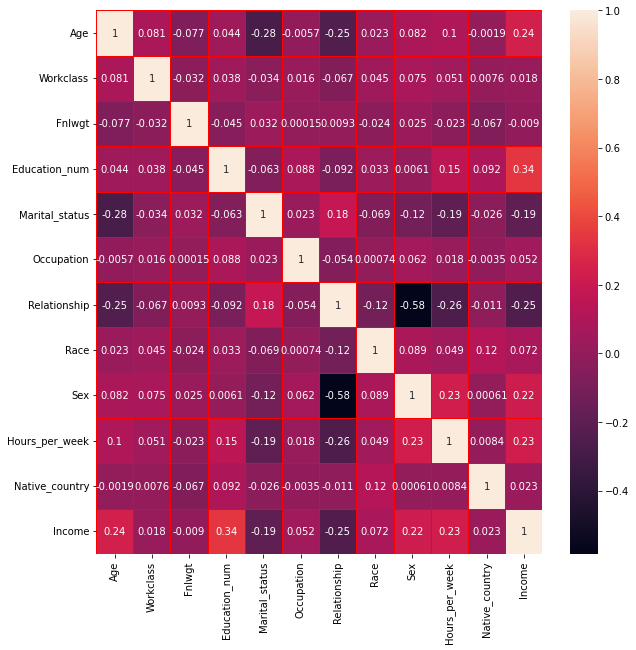

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, linewidth=1, linecolor='red')

Education_num is highly coorelated with target variable but as dtype object, 0.22 is also object dtypes, the 3rd highly coorelated with target varibale is Hours_per_week. Relatioship and Marital_status is negatively coorelated with Target variable. We will drop both columns Marital_status and Relationship

In [39]:
df.drop(['Relationship', "Marital_status"], axis=1, inplace=True)

In [40]:
df.skew()

Age               0.530223
Workclass         1.154786
Fnlwgt            1.459212
Education_num    -0.305328
Occupation        0.110420
Race             -2.506976
Sex              -0.750584
Hours_per_week    0.330856
Native_country   -4.178826
Income            1.161357
dtype: float64

Skewness more than +/-0.5 will be treated Removing skewness from numerical data

In [41]:
from sklearn.preprocessing import power_transform

In [42]:
df[['Fnlwgt','Hours_per_week']]=power_transform(df[['Fnlwgt','Hours_per_week']],method='yeo-johnson')

In [43]:
df.skew()

Age               0.530223
Workclass         1.154786
Fnlwgt            0.016745
Education_num    -0.305328
Occupation        0.110420
Race             -2.506976
Sex              -0.750584
Hours_per_week    0.235762
Native_country   -4.178826
Income            1.161357
dtype: float64

# Checking Outliers

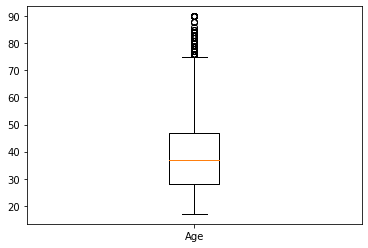

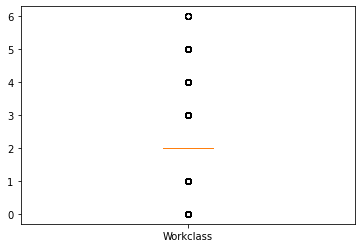

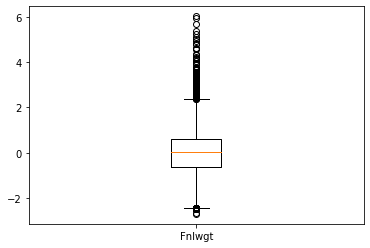

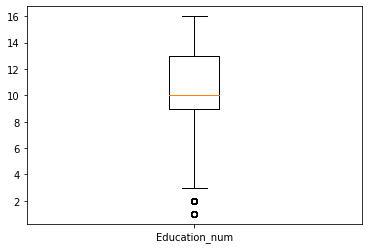

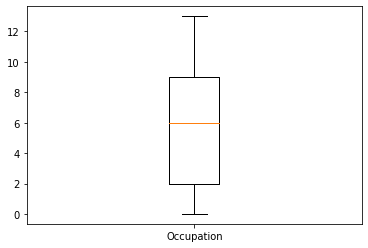

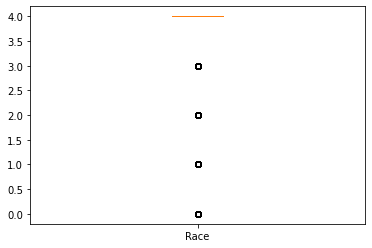

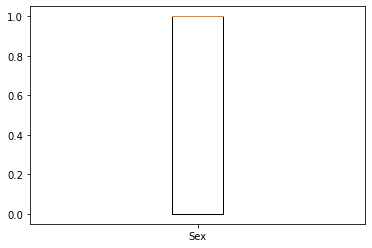

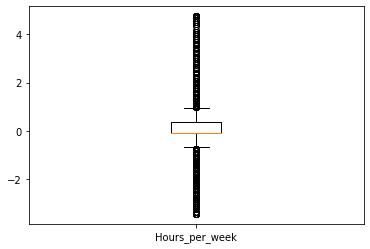

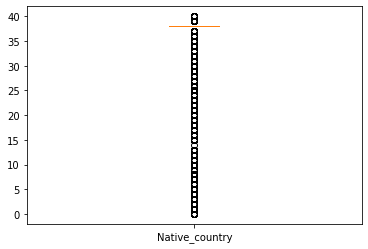

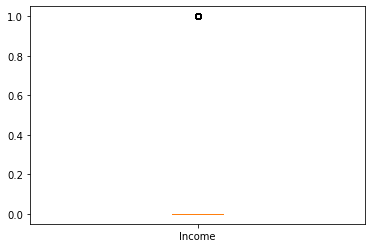

In [44]:
for i in df:
    plt.boxplot(df[i], labels= [i])
    plt.show()

As per above visualization outliers are present 

# Removing Outliers

In [45]:
from scipy.stats import zscore

z=np.abs(zscore(df[['Fnlwgt','Hours_per_week','Income']]))
print(np.where(z>3))

(array([    9,    25,   144,   174,   250,   276,   383,   476,   541,
         629,   759,   859,   933,   978,   980,  1078,  1102,  1168,
        1185,  1274,  1294,  1300,  1348,  1378,  1463,  1545,  1588,
        1675,  1734,  1774,  2004,  2148,  2161,  2179,  2232,  2247,
        2465,  2668,  2681,  2715,  2718,  2732,  2839,  2961,  3028,
        3029,  3067,  3284,  3391,  3429,  3442,  3586,  3635,  3750,
        3760,  3856,  3882,  3921,  3936,  3948,  3951,  3984,  4068,
        4185,  4190,  4336,  4448,  4661,  4805,  4919,  4925,  4969,
        4978,  5011,  5031,  5048,  5090,  5128,  5156,  5210,  5391,
        5551,  5573,  5587,  5668,  5679,  5754,  5763,  5867,  5877,
        5958,  6005,  6092,  6162,  6209,  6210,  6257,  6285,  6307,
        6355,  6582,  6595,  6943,  6991,  7016,  7084,  7205,  7206,
        7253,  7319,  7413,  7419,  7443,  7476,  7512,  7581,  7613,
        7631,  7663,  7724,  7741,  7758,  7778,  7780,  7828,  7891,
        7923,  7965

In [46]:
z=np.abs(zscore(df[['Fnlwgt','Hours_per_week','Income']]))
threshold = 3
df_new = df[(z<3).all(axis = 1)]

print("with outliers::",df.shape)
print("After removing outliers::",df_new.shape)

with outliers:: (30161, 10)
After removing outliers:: (29632, 10)


In [47]:
print ("Percentage of data loss: ", ((30161-29632)/30161)*100)

Percentage of data loss:  1.7539206259739397


# Splitting feature and target vatiables

In [53]:
x=df_new.drop(columns='Income',axis=1)
y=df_new[['Income']]

# Scaling the data using min max scaler¶

In [54]:
from sklearn.preprocessing import MinMaxScaler

mn=MinMaxScaler()
x=mn.fit_transform(x)

# For Balancing the Data using SMOTE

In [48]:
!pip install imblearn

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
smt= SMOTE()

In [62]:
x_sm, y_sm = smt.fit_resample(x, y)
print(f'''Shape of x before SMOTE: {x.shape}
Shape of x after SMOTE: {x_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of x before SMOTE: (29632, 9)
Shape of x after SMOTE: (44544, 9)

Balance of positive and negative classes (%):


Income
0         50.0
1         50.0
dtype: float64

# Importing Model

In [63]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [64]:
xtrain,xtest,ytrain,ytest = train_test_split(x_sm,y_sm,test_size= .22, random_state=42)
estimator = []
estimator.append(('LR',LogisticRegression()))
estimator.append(('KNN',KNeighborsClassifier()))
estimator.append(('SV',SVC()))
estimator.append(('DT',DecisionTreeClassifier()))
estimator.append(('RF',RandomForestClassifier(n_estimators=100, random_state=42)))
estimator

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('SV', SVC()),
 ('DT', DecisionTreeClassifier()),
 ('RF', RandomForestClassifier(random_state=42))]

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
vot_hard = VotingClassifier(estimators= estimator, voting= 'hard')
vot_hard.fit(xtrain,ytrain)
pred = vot_hard.predict(xtest)
print("Accuracy Score", accuracy_score(ytest,pred))
print("Confusion Metrics", confusion_matrix(ytest,pred))
print("Classification_report", classification_report(ytest,pred))

Accuracy Score 0.8323469387755102
Confusion Metrics [[3832 1054]
 [ 589 4325]]
Classification_report               precision    recall  f1-score   support

           0       0.87      0.78      0.82      4886
           1       0.80      0.88      0.84      4914

    accuracy                           0.83      9800
   macro avg       0.84      0.83      0.83      9800
weighted avg       0.84      0.83      0.83      9800



In [68]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(n_estimators=100, random_state=42)
mod = [LR, KNN, SV, DT, RF]

mod

[LogisticRegression(),
 KNeighborsClassifier(),
 SVC(),
 DecisionTreeClassifier(),
 RandomForestClassifier(random_state=42)]

In [69]:
for i in mod:
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= .22, random_state=42)
    i.fit(xtrain,ytrain)
    pred = i.predict(xtest)
    print("Accuracy Score", accuracy_score(ytest,pred))
    print("Confusion Metrics", confusion_matrix(ytest,pred))
    print("Classification_report", classification_report(ytest,pred))

Accuracy Score 0.8058282208588957
Confusion Metrics [[4591  340]
 [ 926  663]]
Classification_report               precision    recall  f1-score   support

           0       0.83      0.93      0.88      4931
           1       0.66      0.42      0.51      1589

    accuracy                           0.81      6520
   macro avg       0.75      0.67      0.70      6520
weighted avg       0.79      0.81      0.79      6520

Accuracy Score 0.786042944785276
Confusion Metrics [[4341  590]
 [ 805  784]]
Classification_report               precision    recall  f1-score   support

           0       0.84      0.88      0.86      4931
           1       0.57      0.49      0.53      1589

    accuracy                           0.79      6520
   macro avg       0.71      0.69      0.70      6520
weighted avg       0.78      0.79      0.78      6520

Accuracy Score 0.8088957055214724
Confusion Metrics [[4686  245]
 [1001  588]]
Classification_report               precision    recall  f1-score 

As per above results support vector classifier has best accuracy

# Now we can check with various parameter using Grid Search CV

In [70]:
from sklearn.model_selection import GridSearchCV
model = SVC()

In [71]:
param_grid = {'kernel' :['rbf','poly','linear'], "C":[0.1,1,10]}

In [72]:
grid = GridSearchCV(estimator = model, param_grid = param_grid)

In [73]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['rbf', 'poly', 'linear']})

In [74]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.8026131828394011
SVC(C=10)
{'C': 10, 'kernel': 'rbf'}


As per Grid Search CV we found the best accuracy when kernel='rbf', c= 10

In [77]:
SVV = SVC(kernel='rbf', C=10)

In [78]:
SVV.fit(xtrain,ytrain)
pred = SVV.predict(xtest)
print("Accuracy Score", accuracy_score(ytest,pred))
print("Confusion Metrics", confusion_matrix(ytest,pred))
print("Classification_report", classification_report(ytest,pred))

Accuracy Score 0.8096625766871166
Confusion Metrics [[4684  247]
 [ 994  595]]
Classification_report               precision    recall  f1-score   support

           0       0.82      0.95      0.88      4931
           1       0.71      0.37      0.49      1589

    accuracy                           0.81      6520
   macro avg       0.77      0.66      0.69      6520
weighted avg       0.80      0.81      0.79      6520



# Cross validation score for Support Vector Classifier

In [79]:
from sklearn.model_selection import cross_val_score
for i in range (2,10):
    score= cross_val_score(SVV,x,y,cv=i)
    print("At cv value at", i,"the cv score is",score)
    print(score.mean())
    print(score.std())

At cv value at 2 the cv score is [0.8025108  0.80399568]
0.8032532397408207
0.000742440604751593
At cv value at 3 the cv score is [0.80026321 0.80560899 0.80500152]
0.8036245734800994
0.0023897451651391836
At cv value at 4 the cv score is [0.80062095 0.80507559 0.80696544 0.80264579]
0.8038269438444925
0.0024022294514790894
At cv value at 5 the cv score is [0.80057365 0.80344188 0.80931488 0.80610867 0.80188998]
0.8042658111534868
0.003125534112653147
At cv value at 6 the cv score is [0.79813727 0.80481879 0.8074509  0.80603361 0.80822195 0.8017416 ]
0.8044006871683874
0.003489226738183318
At cv value at 7 the cv score is [0.79971658 0.80604772 0.80155918 0.80864635 0.80179542 0.80864635
 0.80203166]
0.8040633216367972
0.0033886805872284493
At cv value at 8 the cv score is [0.7975162  0.80507559 0.80210583 0.80885529 0.80885529 0.80534557
 0.80966523 0.7975162 ]
0.8043669006479481
0.00459347741878553
At cv value at 9 the cv score is [0.79866383 0.80321895 0.8038263  0.80807774 0.811057

# AUC ROC CURVE

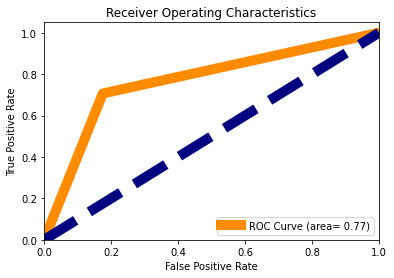

In [80]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred, ytest)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color = "darkorange", lw =10, label ="ROC Curve (area= %0.2f)" %roc_auc)
plt.plot([0,1], [0,1], color= 'navy', lw =10, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc ="lower right")
plt.show()

# Model Saving

In [81]:
import pickle
filename = "Income.pkl"
pickle.dump(SVV, open(filename, 'wb'))